# Respuesta en frecuencia - Sistemas de segundo orden

Librerias necesarias

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib.ticker as tck
import scipy.signal as signal

In [13]:
def plot_resp_freq(freq, H_w, tipo='lineal'):

    if tipo == 'lineal':
        #Calculos de fase y magnitud
        mag_Hw = np.abs(H_w)
        fase_Hw = np.angle(H_w)

        # Figura con dos subplots
        fig, ax = plt.subplots(1,2)
        fig.suptitle('Respuesta en Frecuencia', fontsize=22)
        fig.set_size_inches(20, 10)
        ax[0].plot(freq,mag_Hw)
        ax[1].plot(freq,fase_Hw)
        # add lables
        ax[0].set_xlabel("Frecuencia  \u03C9", fontsize=16)
        ax[0].set_ylabel("Magnitud |H(j*\u03C9)|", fontsize=16)
        ax[1].set_ylabel("Fase \u2220H(j*\u03C9)", fontsize=16)
        ax[1].set_xlabel("Frecuencia \u03C9", fontsize=16)
        ax[0].grid(True)
        ax[1].grid(True)
        plt.show()

    elif tipo == 'bode':
        #Transformacion a decibeles
        mag_Hw_dB = 20*np.log10(np.abs(H_w))
        fase_Hw = np.angle(H_w)*180/np.pi

        #Conservo solo lo que corresponde a frecuencias positivas
        indx = np.where(freq >= 0.01)
        mag_Hw_dB = mag_Hw_dB[indx]
        fase_Hw = fase_Hw[indx]
        freq = freq[indx]

        # Figura con dos subplots
        fig, ax = plt.subplots(1,2)
        fig.suptitle('Respuesta en Frecuencia', fontsize=22)
        fig.set_size_inches(20, 10)
        ax[0].plot(freq,mag_Hw_dB)
        ax[0].semilogx()
        ax[1].plot(freq,fase_Hw)
        ax[1].semilogx()
        # add lables
        ax[0].set_xlabel("Frecuencia  \u03C9", fontsize=16)
        ax[0].set_ylabel("Magnitud 20*log10|H(j*\u03C9)| [dB]", fontsize=16)
        ax[1].set_ylabel("Fase \u2220H(j*\u03C9)", fontsize=16)
        ax[1].set_xlabel("Frecuencia \u03C9", fontsize=16)
        ax[0].grid(True)
        ax[1].grid(True)
        plt.show()

## Filtro Pasa-Bajos

Suponga un filtro con la siguiente función de transferencia:  $H(s) = \frac{{\omega}_0^2}{(s^2+s\frac{{\omega}_0}{Q}+{\omega}_0^2}$
    
La respuesta en frecuencia del filtro es: $H(j\omega) = \frac{{\omega}_0^2}{(j\omega)^2+(j\omega)\frac{{\omega}_0}{Q}+{\omega}_0^2}$ 


### Con Q= 1/2

In [24]:
#frecuencia
fmin = -100
fmax = 100
paso = 0.001
f = np.arange(fmin,fmax+1,paso)
w = f*2*np.pi

#sistema
w0 = 2
Q = 1/2
H_w = (w0**2)/((1j*w)**2 + (1j*w)*w0/Q + w0**2) # 

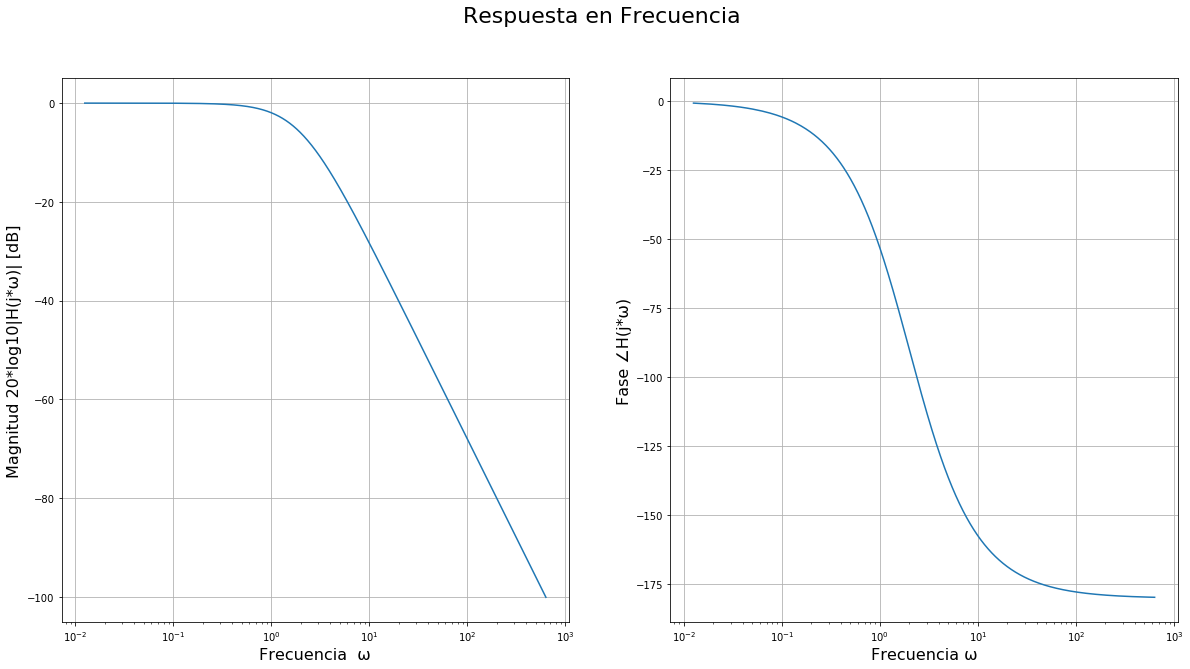

In [25]:
#plot_resp_freq(w, H_w, 'lineal')
plot_resp_freq(w, H_w, 'bode')

### Con Q > 1/2

In [22]:
#sistema
w0 = 2
Q = 2
H_w = (w0**2)/((1j*w)**2 + (1j*w)*w0/Q + w0**2) # 

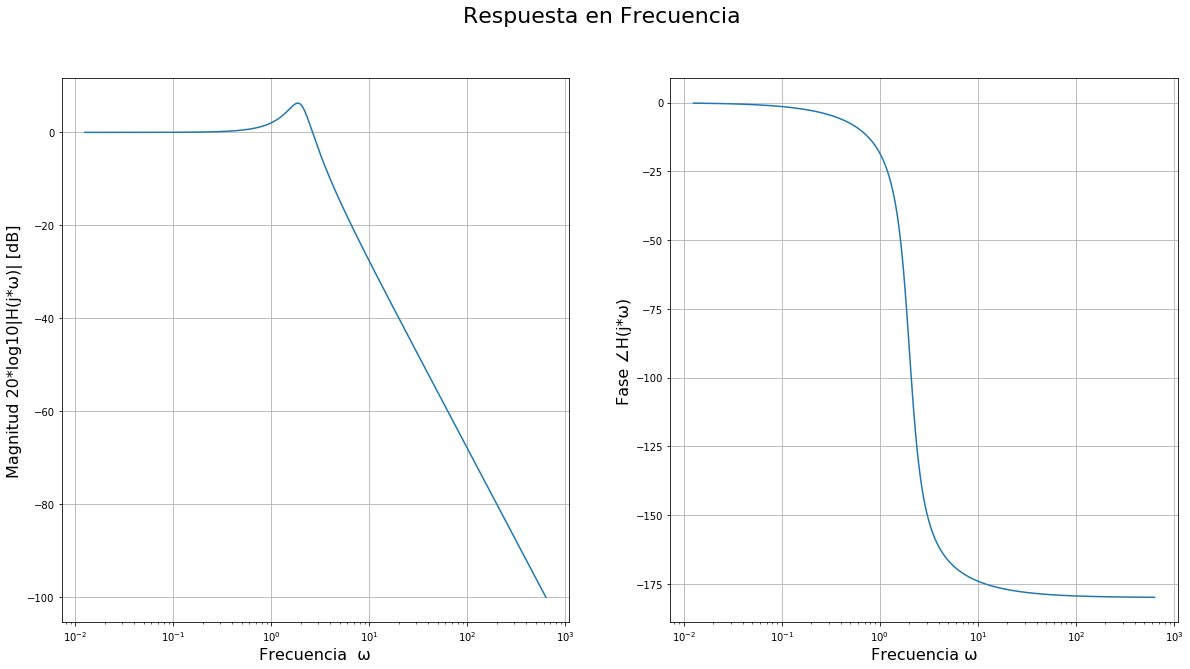

In [23]:
plot_resp_freq(w, H_w, 'bode')

### Con Q < 1/2

In [28]:
#sistema
w0 = 2
Q = 0.1
H_w = (w0**2)/((1j*w)**2 + (1j*w)*w0/Q + w0**2) # 

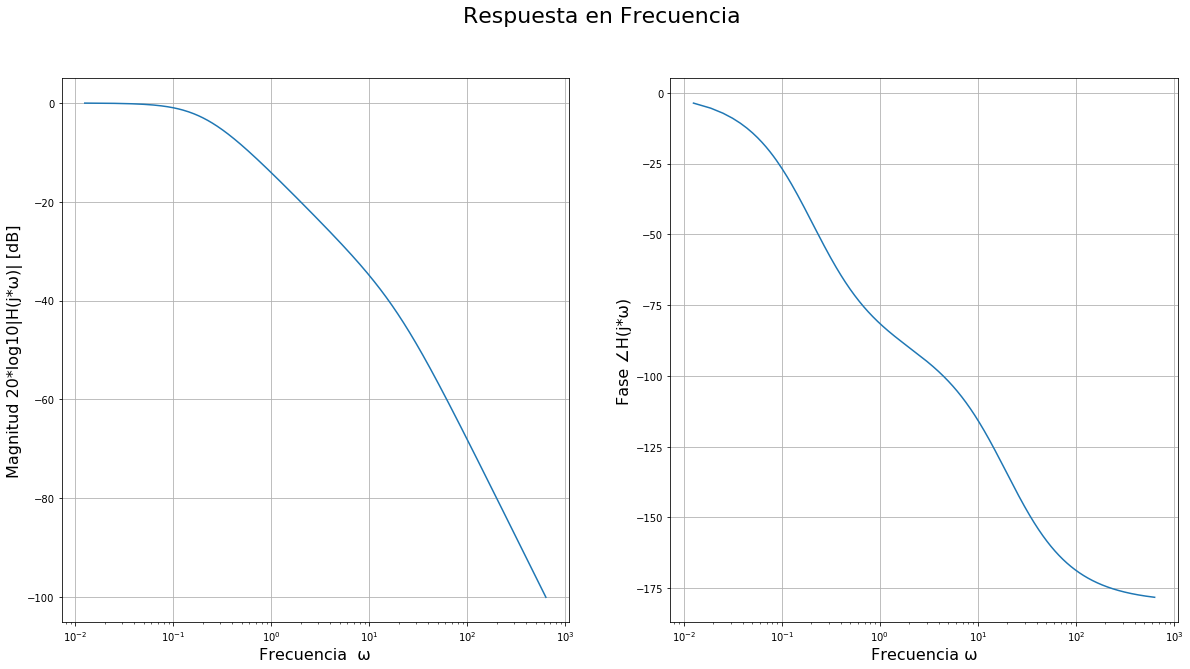

In [29]:
plot_resp_freq(w, H_w, 'bode')

## Utilizando la libreria scipy.signal

In [1]:
#sistema
w0 = 2
Q = 2
sys = signal.lti([0, 0, w0**2], [1, w0/Q, w0**2]) # 

#respuesta en frecuencia
w, H = signal.freqresp(sys,w)
mag = abs(H)#magnitud
#fase = np.angle(H,deg=True)#fase[deg]
fase = np.angle(H)/np.pi#fase[rad]

NameError: name 'signal' is not defined

C:\Users\Agustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


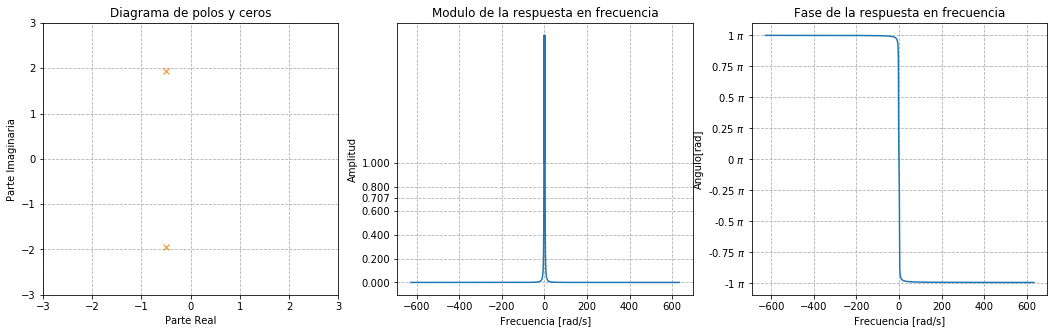

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

#diagrama de polos y ceros
ax1.plot(sys.zeros.real, sys.zeros.imag, 'o')#creos
ax1.plot(sys.poles.real, sys.poles.imag, 'x')#polos
ax1.set_xlim(-3,3)#limite en parte real
ax1.set_ylim(-3,3)#limite en parte imaginaria
ax1.grid(linestyle='--')#grilla punteada
ax1.set_title("Diagrama de polos y ceros")
ax1.set_xlabel("Parte Real")
ax1.set_ylabel("Parte Imaginaria")
ax2.plot(w,mag)
#ax2.plot(w0,np.sqrt(2)/2,'x')
ax2.set_title("Modulo de la respuesta en frecuencia")
ax2.set_xlabel("Frecuencia [rad/s]")
ax2.set_ylabel("Amplitud")
ax2.set_yticks([0,0.2,0.4,0.6,np.sqrt(2)/2,0.8,1])
ax2.grid(linestyle='--')
ax3.plot(w,fase)
#ax3.plot(w0,-1/4,'x')
ax3.set_title("Fase de la respuesta en frecuencia")
ax3.set_xlabel("Frecuencia [rad/s]")
ax3.set_ylabel("Angulo[rad]")
ax3.yaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax3.yaxis.set_major_locator(tck.MultipleLocator(base=0.25))
ax3.grid(linestyle='--')
fig.show()

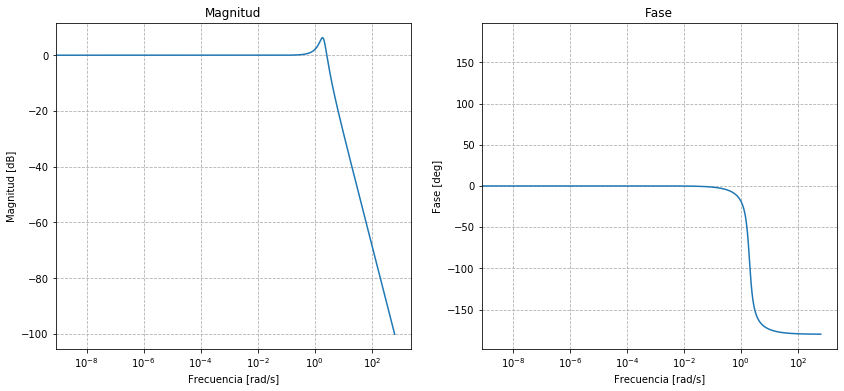

In [33]:
wb, magb, faseb = signal.bode(sys,w)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.semilogx(wb, magb)
#ax1.plot(w0,-3,'x')
ax1.set_title("Magnitud")  
ax1.set_xlabel("Frecuencia [rad/s]")  
ax1.set_ylabel("Magnitud [dB]")
ax1.grid(linestyle='--', which="both")#grilla punteada para escala logaritmica
ax2.semilogx(w, faseb)  
#ax2.plot(w0,-45,'x')
ax2.set_title("Fase")
ax2.set_xlabel("Frecuencia [rad/s]")  
ax2.set_ylabel("Fase [deg]") 
ax2.grid(linestyle='--', which="both")